In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random 
from src.viz import plot_bipartite_graph
from src.utils import generate_bipartite_erdos_graph
from src.opt import BudgetedAllocationSolver
from src.evaluator import OnlineMatchingEvaluator
from src.nonadaptive import NonAdaptive
from src.stochasticbalance import StochasticBalance
from src.semiadaptative import SemiAdaptative
from src.baseline import Baseline, BaselineAdaptive
from src.benchmark import eval_benchmark
# auto update imports
%load_ext autoreload
%autoreload 2

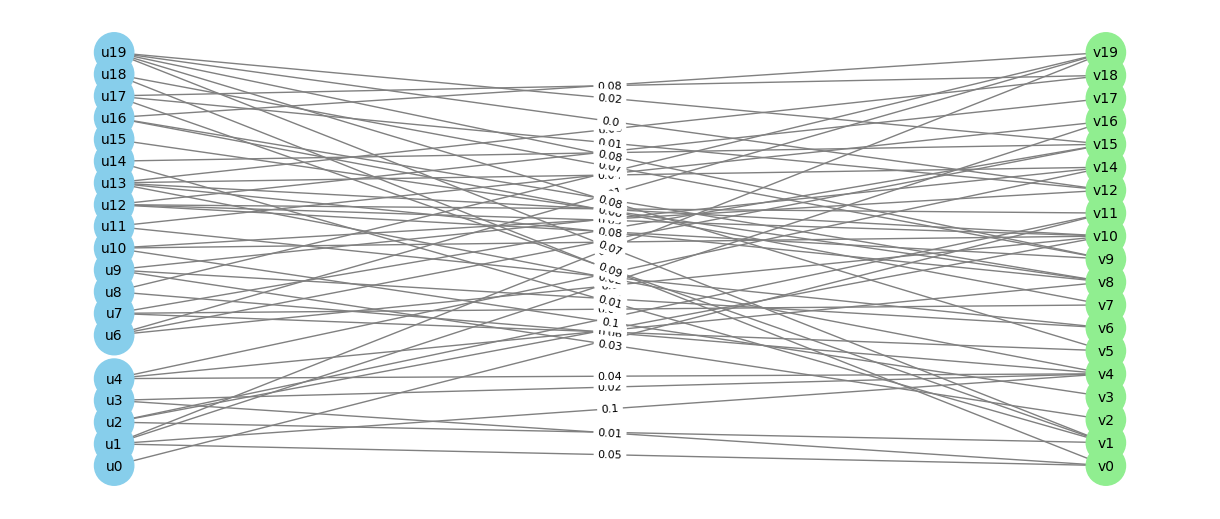

In [2]:
n_U, n_V = 20, 20

B, edges = generate_bipartite_erdos_graph(n_U, n_V, p_erd=np.log(n_U)/n_U, p_max=0.1)

U = [f"u{i}" for i in range(n_U)]
V = [f"v{j}" for j in range(n_V)]

plot_bipartite_graph(B, U, V, save_fig='./figs/graph_example.pdf')

In [7]:
algo = NonAdaptive(edges)

evaluator = OnlineMatchingEvaluator(algo, B, edges)
evaluator.run()

1

In [9]:
algo = StochasticBalance(edges)

evaluator = OnlineMatchingEvaluator(algo, B, edges)
score = []
for _ in range(50):
    score.append(evaluator.run())

sum(score)/len(score)

0.38

In [10]:
# Permet d'appeler le score de OPT sur le graph

evaluator.opt

1.3000000000005196

## Benchmark

In [11]:
opt = {"algos": [Baseline, NonAdaptive, BaselineAdaptive, StochasticBalance, SemiAdaptative], # List des fonction de chaque algo
       "names": ['Naive', 'NonAdaptive', 'NaiveAdaptive', 'StochasticBalance', 'SemiAdaptative'],
       "p_values": ["random", 0.5, 0.1, 0.05], # Not the classical p values...
       "U_n": [20, 50, 150],
       "p_erd": [0.2, "sparse", "highly"],
       "k": 20,
       "p_max":0.1 # Proba max dans un edge dans le cas random
      }

results = eval_benchmark(opt)

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:12<00:00,  3.18s/it]


In [14]:
from src.utils import results_to_df

df_results = results_to_df(results)
df_results.round(2)

Naive  NonAdaptive  NaiveAdaptive  StochasticBalance  \
p_value U_n p_erd                                                          
random  20  0.2      0.26         0.53           0.56               0.38   
            n        0.39         0.44           0.56               0.33   
            logn/n   0.26         0.41           0.52               0.44   
        50  0.2      0.31         0.46           0.56               0.51   
            n        0.48         0.50           0.50               0.37   
            logn/n   0.37         0.52           0.59               0.48   
        150 0.2      0.27         0.44           0.51               0.49   
            n        0.44         0.55           0.52               0.64   
            logn/n   0.34         0.46           0.52               0.48   
0.5     20  0.2      0.04         0.10           0.10               0.10   
            n        0.09         0.09           0.09               0.09   
            logn/n   0.05         0.10           0.10               0.10   
        50  0.2      0.02         0.10           0.10               0.10   
            n        0.08         0.13           0.13               0.13   
            logn/n   0.05         0.10           0.10               0.10   
        150 0.2      0.01         0.10           0.10               0.10   
            n        0.08         0.11           0.11               0.11   
            logn/n   0.04         0.10           0.10               0.10   
0.1     20  0.2      0.20         0.38           0.50               0.50   
            n        0.29         0.33           0.38               0.38   
            logn/n   0.28         0.44           0.50               0.53   
        50  0.2      0.12         0.43           0.50               0.50   
            n        0.35         0.40           0.44               0.37   
            logn/n   0.22         0.43           0.50               0.49   
        150 0.2      0.07         0.46           0.50               0.50   
            n        0.34         0.42           0.41               0.43   
            logn/n   0.20         0.44           0.48               0.49   
0.05    20  0.2      0.40         0.65           0.75               0.75   
            n        0.33         0.67           0.73               0.67   
            logn/n   0.41         0.76           0.88               0.88   
        50  0.2      0.18         0.64           0.98               0.96   
            n        0.43         0.49           0.49               0.69   
            logn/n   0.33         0.65           0.69               0.86   
        150 0.2      0.09         0.64           0.99               0.96   
            n        0.55         0.57           0.61               0.69   
            logn/n   0.30         0.60           0.82               0.83   

                    SemiAdaptative  
p_value U_n p_erd                   
random  20  0.2               0.44  
            n                 0.50  
            logn/n            0.48  
        50  0.2               0.42  
            n                 0.37  
            logn/n            0.45  
        150 0.2               0.43  
            n                 0.48  
            logn/n            0.46  
0.5     20  0.2               0.10  
            n                 0.09  
            logn/n            0.10  
        50  0.2               0.10  
            n                 0.13  
            logn/n            0.10  
        150 0.2               0.10  
            n                 0.11  
            logn/n            0.10  
0.1     20  0.2               0.48  
            n                 0.38  
            logn/n            0.42  
        50  0.2               0.44  
            n                 0.39  
            logn/n            0.38  
        150 0.2               0.44  
            n                 0.41  
            logn/n            0.46  
0.05    20  0.2               0.65  
            n        

In [131]:
df_results.round(2).to_latex('./figs/results.tex')

/var/folders/k1/n25_cgpj17b12lgf2qvp_t_h0000gn/T/ipykernel_40811/2769141091.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_results.round(2).to_latex('./figs/results.tex')
